### 导包

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import tensorflow as tf
print('keras:',keras.__version__,'tensorflow:',tf.__version__)

keras: 2.1.0 tensorflow: 1.2.1


<font size=4>CIFAR-10(<a>http://www.cs.toronto.edu/~kriz/cifar.html</a>)是图片识别的benchmark问题，主要对RGB为32*32的图像进行10分类，类别包括：airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck。其中包括50000张训练图片，10000张测试图片。</font>
<img src='imgs/cifar10.png'>

### 加载数据集

In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #每张图片的大小为32×32×3
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [3]:
print(y_test)

[[3]
 [8]
 [8]
 ..., 
 [5]
 [1]
 [7]]


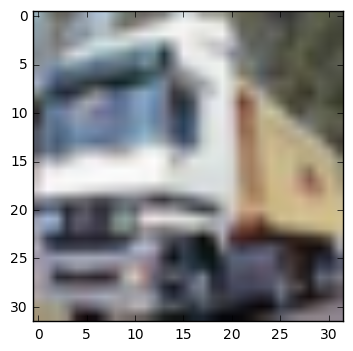

[[6]
 [9]
 [9]
 ..., 
 [9]
 [1]
 [1]] [6 9 9 ..., 9 1 1]


In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()
print(y_train,y_train.flatten())

### 数据预处理

In [4]:
num_classes = 10
# x_train = x_train.reshape(-1,32,32,3)/255
# x_test = x_test.reshape(-1,32,32,3)/255
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_train = y_train.reshape(x_train.shape[0],-1)
y_test = y_test.reshape(x_test.shape[0],-1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(y_test)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]]


### 搭建模型
* 卷积层->池化层->卷积层->池化层->全连结层->全连结层->Softmax层

In [7]:
model = Sequential()
print(x_train.shape[1:]) #(32, 32, 3)
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
#在训练过程中每次更新参数时按一定概率（rate）随机断开输入神经元，Dropout层用于防止过拟合
model.add(Dropout(0.25)) 

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.25))

#把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。
model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

(32, 32, 3)


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

### 编译模型

In [9]:
# initiate RMSprop optimizer
opt = RMSprop(lr=0.001, decay=1e-6)
# train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### 训练模型

In [10]:
print(x_train.shape,y_train.shape)
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

(50000, 32, 32, 3) (50000, 10)
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 157s 4ms/step - loss: 1.7278 - acc: 0.3741 - val_loss: 1.4201 - val_acc: 0.5016
Epoch 2/10
40000/40000 [==============================] - 177s 4ms/step - loss: 1.3565 - acc: 0.5196 - val_loss: 1.1879 - val_acc: 0.5940
Epoch 3/10
40000/40000 [==============================] - 160s 4ms/step - loss: 1.2007 - acc: 0.5736 - val_loss: 1.1221 - val_acc: 0.6072
Epoch 4/10
40000/40000 [==============================] - 140s 4ms/step - loss: 1.1019 - acc: 0.6129 - val_loss: 1.0335 - val_acc: 0.6412
Epoch 5/10
40000/40000 [==============================] - 142s 4ms/step - loss: 1.0270 - acc: 0.6395 - val_loss: 0.9768 - val_acc: 0.6572
Epoch 6/10
40000/40000 [==============================] - 137s 3ms/step - loss: 0.9695 - acc: 0.6596 - val_loss: 0.9179 - val_acc: 0.6876
Epoch 7/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.9208 - ac

### 评估模型

In [13]:
# evaluate
loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
print('loss:',loss,'\t','accuracy:',accuracy)

10000/10000 [==============================] - 10s 972us/step
loss: 0.921976679993 	 accuracy: 0.6989


### 绘制模型准确率和误差函数的曲线

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])


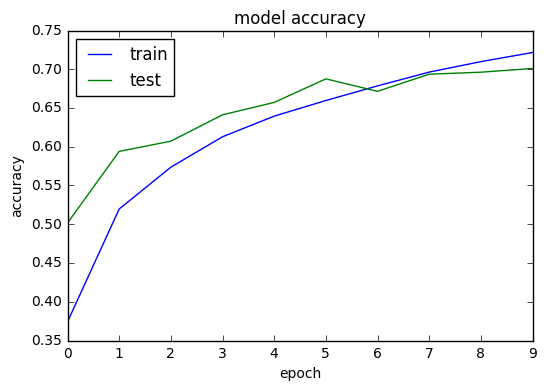

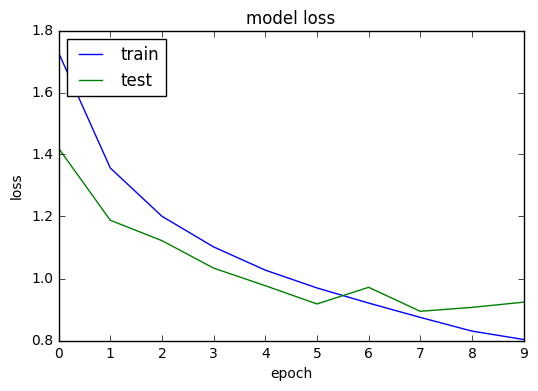

In [15]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 预测模型

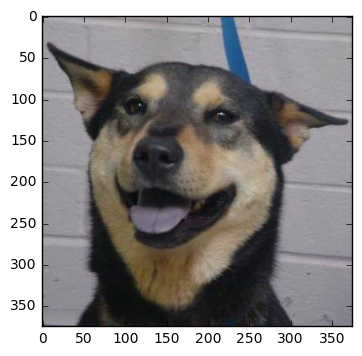

(1, 32, 32, 3)
1/1 [==============================] - 0s 3ms/step
[6]


In [21]:
import numpy as np
from skimage.transform import resize
#预测自定义图片
my_img = np.array(plt.imread('input_imgs/dog.jpg'))
plt.imshow(my_img)
plt.show()
my_img = resize(my_img,(32,32,3)) #图片缩放到指定大小28*28
my_img = my_img.reshape(1,32,32,3) #1张32*32*3的图片
print(my_img.shape)
# res = model.predict(my_img)  print(np.argmax(res))
res = model.predict_classes(my_img)
print(res)

### 保存模型

In [14]:
model_name = 'cifar10.h5'
model.save(model_name)

### 加载模型

In [15]:
from keras.models import load_model
del model  #删除已存在的模型
model = load_model(model_name)

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [26]:
import numpy as np
x = np.zeros((1,5))
print(x,x.shape)
x = x.T
print(x,x.shape)
y = np.zeros((5,1))
# print(y,y.shape)

[[ 0.  0.  0.  0.  0.]] (1, 5)
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] (5, 1)
